<a href="https://colab.research.google.com/github/Rahullnitp/Alphabet_Inc_Stock_Market_Prediction/blob/master/Alphabet_Inc_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim

Stock market prediction of  Alphabet Inc. .



*  In this project , i will analyse and perform predictive analytics on the historic data of Alphabet Inc. and perform  a classification or regression task to predict future price or return. 

*   Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a corporate restructuring of Google, and became the parent company of Google and several former Google subsidiaries.  

#Data Collection :
     

*   Alpha vantage APIs is used for Data Collection of "Alphabet Inc." 

In [28]:
pip install alpha_vantage   #Python module to get stock data from the Alpha Vantage Api

 Extract data in 'data' and information of data in 'meta_data' variables respectively.


  





In [0]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='1Z4BA7A9NKB32IJL',output_format='pandas')
data, meta_data = ts.get_daily('GOOGL', outputsize='full') #by using symbol as "GOOGL" ,we can extract the data of 'Alphabet Inc.' .

Overview of data
*  This API returns daily time series (date, daily open, daily high, daily low, daily close, daily volume, daily adjusted close, and split/dividend events) of the global equity specified, covering 20+ years of historical data as shown below in meta_data.

In [147]:
meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOGL',
 '3. Last Refreshed': '2019-12-10',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

#Data_preprocessing:

in this section, i will perform Data mining technique that involves transforming raw data into an understandable format and Data Cleaning .


In [0]:
# import libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams


In [149]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-12-10,1339.94,1348.00,1334.00,1342.89,868417.0
2019-12-09,1338.86,1357.55,1336.07,1342.99,1556889.0
2019-12-06,1332.75,1342.47,1331.23,1339.39,1648729.0
2019-12-05,1327.00,1327.98,1314.32,1326.96,1220631.0
2019-12-04,1306.10,1324.27,1303.05,1318.94,1776392.0


In [150]:
data.shape

(3855, 5)

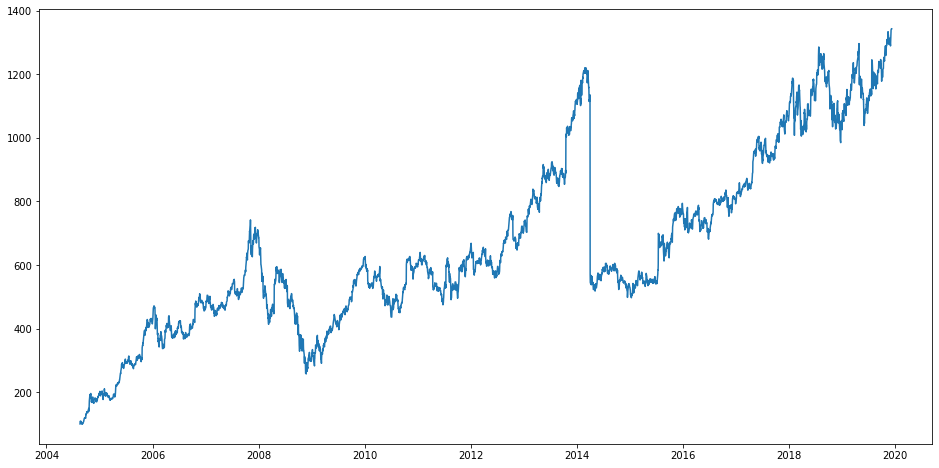

In [151]:
#Let’s plot the 'close' variable to understand how it’s shaping up in our data: 

plt.figure(figsize=(16,8))
plt.plot(data['4. close'], label='Close Price history')

In [0]:
#Change the data format ,so that it will be easy to understand and readable.

data.columns=['open','high','low','close','volume']
data=data.reset_index()

In [153]:
data.head().transpose()

,0,1,2,3,4
date,2019-12-10 00:00:00,2019-12-09 00:00:00,2019-12-06 00:00:00,2019-12-05 00:00:00,2019-12-04 00:00:00
open,1339.94,1338.86,1332.75,1327,1306.1
high,1348,1357.55,1342.47,1327.98,1324.27
low,1334,1336.07,1331.23,1314.32,1303.05
close,1342.89,1342.99,1339.39,1326.96,1318.94
volume,868417,1.55689e+06,1.64873e+06,1.22063e+06,1.77639e+06


In [154]:
data.describe()   # for statistical details like percentile, mean, std and quantiles of data.

,open,high,low,close,volume
count,3855.000000,3855.000000,3855.000000,3855.000000,3.855000e+03
mean,659.110933,665.193289,652.551436,658.958307,7.138003e+06
std,278.382002,280.044492,276.668582,278.495475,8.011137e+06
min,99.090000,101.740000,95.960000,100.010000,3.845900e+04
25%,475.115000,480.030000,470.310000,474.605000,1.926933e+06
50%,588.160000,592.340000,582.820000,587.140000,4.428500e+06
75%,828.965000,831.905000,823.248800,828.360000,9.150600e+06
max,1339.940000,1357.550000,1336.070000,1342.990000,8.215110e+07


In [155]:
data.info()        #Information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 6 columns):
date      3855 non-null datetime64[ns]
open      3855 non-null float64
high      3855 non-null float64
low       3855 non-null float64
close     3855 non-null float64
volume    3855 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 180.8 KB




*   'date' is of datetime type while all others are float




In [156]:
data.isnull().sum() # number of null values in each column.

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

#Models

##i).Moving Average



*   The predicted closing price for each day will be the average of a set of previously observed values. 

*   for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.



In [0]:
#arrange the data in ascending order
data=data.sort_values('date',ascending=True).reset_index().drop('index',axis=1)

In [158]:
data.head()

,date,open,high,low,close,volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0
3,2004-08-24,111.24,111.60,103.57,104.870,15247300.0
4,2004-08-25,104.76,108.00,103.88,106.000,9188600.0




* In this method we have the use of only 'date' and target feature 'close'.so,we will make a new dataframe called as 'data_M_A'

In [0]:
#make new dataframe
data_M_A=data[['date','close']]

In [0]:
#splitting in train and test set.
train_len=int(0.9*len(data_M_A))    # not using following method for splitting data as it rearrange the the data every time it splitt.
train=data_M_A[:train_len]          # x_train,x_valid,y_train,y_valid=train_test_split(data_M_A,y_label,test_size=.15,random_state=0)     # Split the data in two parts i.e. train and validation part.

valid=data_M_A[train_len:]

In [0]:
#Making the prediction
predictions = []
for i in range(0,valid.shape[0]):
    a = train['close'][len(train)-valid.shape[0]+i:].sum() + sum(predictions)
    b = a/(valid.shape[0])
    predictions.append(b)

In [162]:
#Checking the result(RMSE values)

ms=mean_squared_error(np.array(valid['close']), predictions)      
rms=np.sqrt(ms)
rms                                       # Mathematically: rms=np.sqrt(np.mean(np.power((np.array(y_valid)-predictions),2)))

171.66824372162446

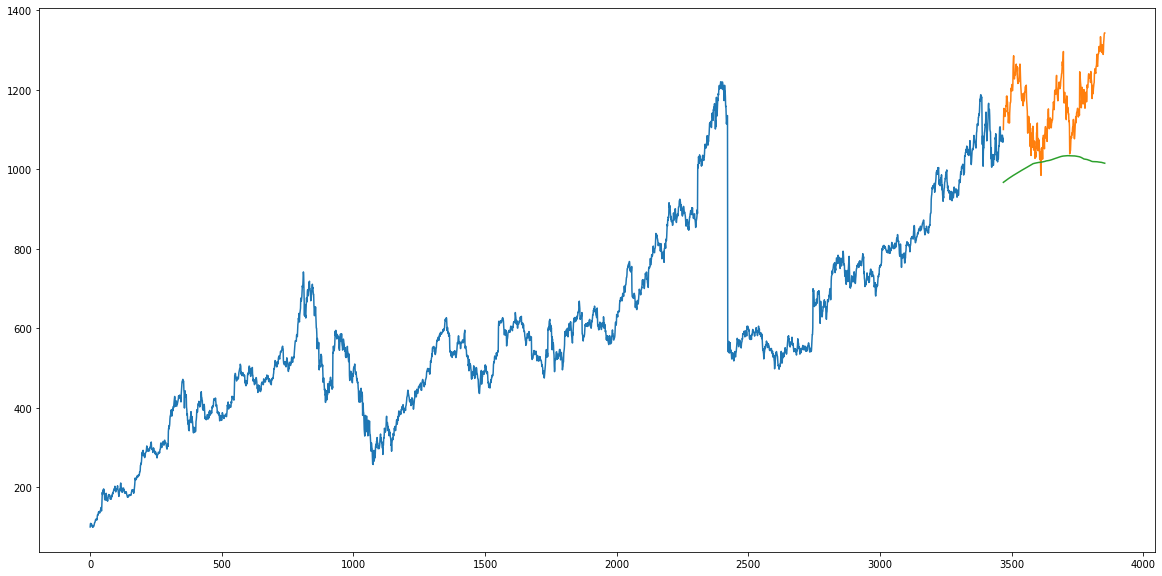

In [163]:
#plot
valid['predictions'] = 0
valid['predictions'] = predictions
plt.figure(figsize=(20,10))
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
#plt.plot(data['close'])
